In [1]:
!pip install ccxt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


# Importing libaries

In [123]:
# generate dataframe through ccxt

import ccxt 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate datafame using ccxt

In [156]:
pd.set_option('display.max_rows',10)

binance = ccxt.binance()
btc_ohlcv = binance.fetch_ohlcv("BTC/USDT", '1h')

df = pd.DataFrame(btc_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df.set_index('datetime', inplace=True)
print(df)

                         open      high       low     close       volume
datetime                                                                
2023-01-08 14:00:00  16933.32  16954.30  16931.25  16952.44   5570.28633
2023-01-08 15:00:00  16952.44  17019.79  16938.00  17000.43   9212.24098
2023-01-08 16:00:00  17000.43  17022.08  16916.10  16936.87  10618.32869
2023-01-08 17:00:00  16936.87  16952.03  16920.30  16928.50   5335.04620
2023-01-08 18:00:00  16928.89  16936.49  16919.94  16929.84   3902.21677
...                       ...       ...       ...       ...          ...
2023-01-29 05:00:00  23228.89  23255.00  23190.08  23249.50   6306.20767
2023-01-29 06:00:00  23249.50  23268.51  23183.17  23198.58   6038.90792
2023-01-29 07:00:00  23199.30  23220.76  23174.47  23203.86   5393.54974
2023-01-29 08:00:00  23203.39  23224.55  23153.64  23172.28   5894.58708
2023-01-29 09:00:00  23172.28  23207.56  23156.89  23204.54   1567.96449

[500 rows x 5 columns]


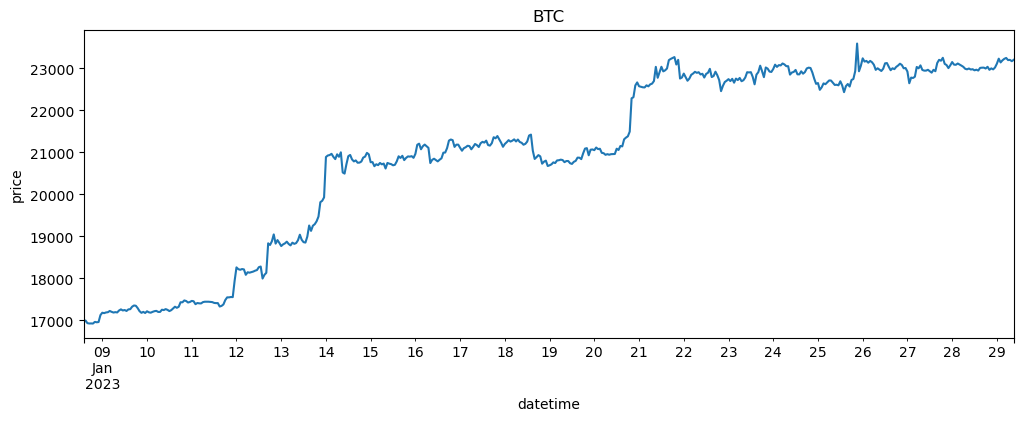

In [157]:
plt.style.use(['default'])
df['close'].plot(figsize=(12,4), title='BTC')
plt.xlabel('datetime')
plt.ylabel('price')

plt.show()

In [158]:
# 진입조건을 위한 칼럼 생성
df['long'] = (df['close'] - df['low'])/(df['high'] - df['low']) < 0.2
df['short'] = (df['close'] - df['low'])/(df['high'] - df['low']) > 0.8

In [159]:
import copy

df0 = df.copy()
df = copy.deepcopy(df0)

In [160]:
# Create a new column called "position"
df["position_long"] = 0

# Set the value of "position" to 1 if "long" is True, and -1 if "short" is True
df.loc[df["short"] == True, "position_long"] = -1
df.loc[df["long"] == True, "position_long"] = 1

In [161]:
pd.set_option('display.max_rows',10)

df

,open,high,low,close,volume,long,short,position_long
datetime,,,,,,,,
2023-01-08 14:00:00,16933.32,16954.30,16931.25,16952.44,5570.28633,False,True,-1
2023-01-08 15:00:00,16952.44,17019.79,16938.00,17000.43,9212.24098,False,False,0
2023-01-08 16:00:00,17000.43,17022.08,16916.10,16936.87,10618.32869,True,False,1
2023-01-08 17:00:00,16936.87,16952.03,16920.30,16928.50,5335.04620,False,False,0
2023-01-08 18:00:00,16928.89,16936.49,16919.94,16929.84,3902.21677,False,False,0
...,...,...,...,...,...,...,...,...
2023-01-29 05:00:00,23228.89,23255.00,23190.08,23249.50,6306.20767,False,True,-1
2023-01-29 06:00:00,23249.50,23268.51,23183.17,23198.58,6038.90792,True,False,1
2023-01-29 07:00:00,23199.30,23220.76,23174.47,23203.86,5393.54974,False,False,0


In [162]:
# delete duplicated signals
filled = df['position_long'].mask(df['position_long'] == 0).ffill().fillna(0)
df['position_long'] = filled.where(filled != filled.shift(), 0)

# deal with the edge case
df['position_long'].iloc[0] = 0

/var/folders/lw/t_96h5c913bfc328579th71r0000gn/T/ipykernel_53839/399461063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position_long'].iloc[0] = 0


In [163]:
# See the change

df

,open,high,low,close,volume,long,short,position_long
datetime,,,,,,,,
2023-01-08 14:00:00,16933.32,16954.30,16931.25,16952.44,5570.28633,False,True,0.0
2023-01-08 15:00:00,16952.44,17019.79,16938.00,17000.43,9212.24098,False,False,0.0
2023-01-08 16:00:00,17000.43,17022.08,16916.10,16936.87,10618.32869,True,False,1.0
2023-01-08 17:00:00,16936.87,16952.03,16920.30,16928.50,5335.04620,False,False,0.0
2023-01-08 18:00:00,16928.89,16936.49,16919.94,16929.84,3902.21677,False,False,0.0
...,...,...,...,...,...,...,...,...
2023-01-29 05:00:00,23228.89,23255.00,23190.08,23249.50,6306.20767,False,True,0.0
2023-01-29 06:00:00,23249.50,23268.51,23183.17,23198.58,6038.90792,True,False,1.0
2023-01-29 07:00:00,23199.30,23220.76,23174.47,23203.86,5393.54974,False,False,0.0


In [164]:
# make dataframe with position == 1 or position == -1
df2 = df.loc[(df.position_long==1)|(df.position_long==-1),:].copy()
df2['exit_close_long'] = df2['close'].shift(1)
# calculate return
df2['ror'] = df2['close'] / df2['exit_close_long']
df2.loc[df2['position_long']==1,'ror'] = 1

df['ror_long'] = df2['ror']
df['ror_long']= df['ror_long'].fillna(1)
# calculate accumulated ror
df['total_long'] = df['ror_long'].cumprod()

# calculate performance indicator

# return trading days
trade_day = int(len(df.index)/24)
result = round((df['total_long'].iat[-1] / df['total_long'].iat[0] - 1)*100, 3)

print(trade_day,'days / ', result,'return(%)')

20 days /  16.269 return(%)


In [165]:
# calculate CAGR
total_profit = (df['total_long'].iat[-1] / df['total_long'].iat[0])
cagr = round((total_profit**(1/(trade_day/365))-1)*100,2)

# calculate MDD
arr_v = np.array(df['total_long'])
peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
peak_upper = np.argmax(arr_v[:peak_lower])

mdd = round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]*100,3)

print('CAGR:',cagr,'MDD:',mdd)

CAGR: 1465.65 MDD: -1.112


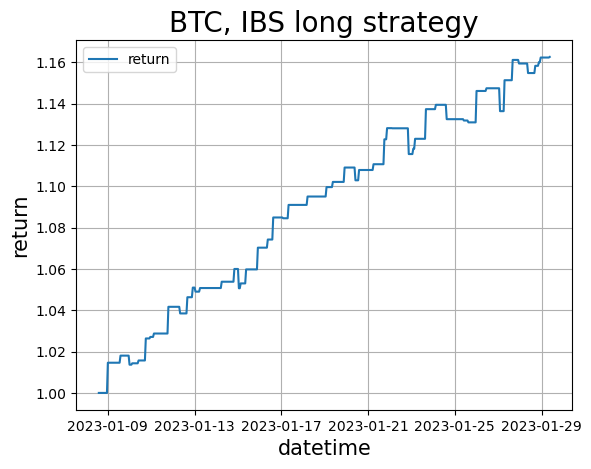

In [166]:
# Let's plot return
plt.plot(df['total_long'], label = 'return')
plt.ylabel('return', fontsize = 15 )
plt.xlabel('datetime', fontsize = 15 )
plt.title('BTC, IBS long strategy', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, 'Close')

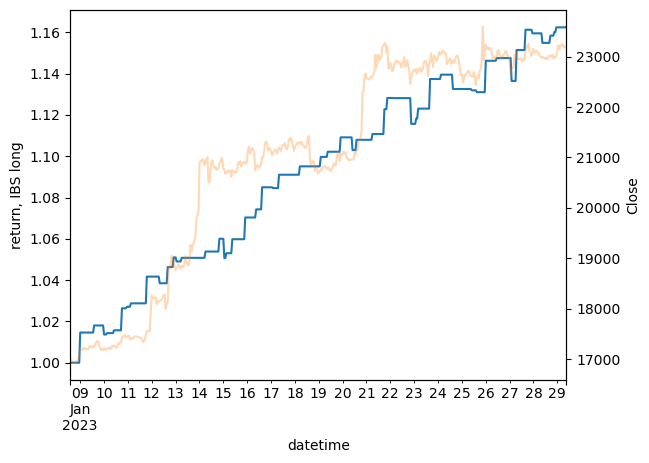

In [167]:
# plot the BTC price and return of strategy
fig, ax = plt.subplots()
df['total_long'].plot(ax=ax)
ax2 = df['close'].plot(ax=ax, secondary_y=True,alpha=.3)
ax.set_ylabel('return, IBS long')
ax2.set_ylabel('Close')

In [168]:
# Calculate average return of trade

avg_return = np.mean(df.ror_long) - 1
avg_return

0.000303662025874063

In [169]:
# number of trades
ror_trade = df.loc[df['ror_long'] != 1.000,:]
print('number of trades: ', ror_trade.shape[0])

number of trades:  53


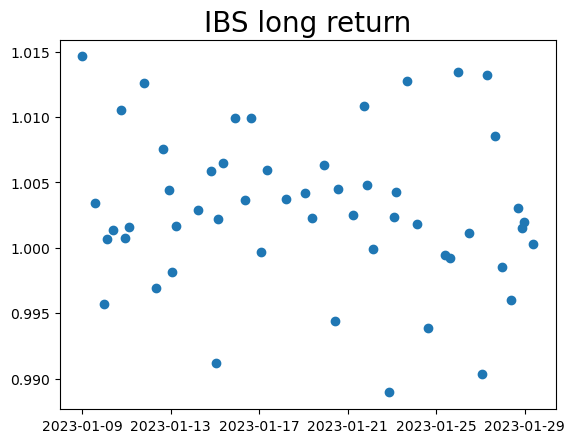

In [173]:
# Scatter ror_long

plt.scatter(ror_trade.index, ror_trade['ror_long'])
plt.title('IBS long return', fontsize = 20)
plt.show()

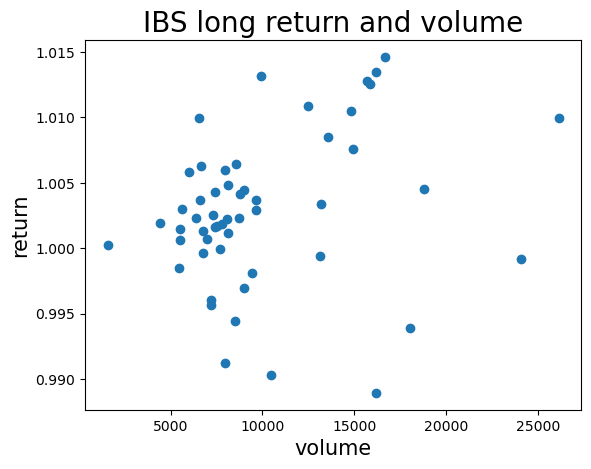

In [172]:
# Scatter ror_long with volume

plt.scatter(ror_trade['volume'], ror_trade['ror_long'])
plt.ylabel('return', fontsize = 15 )
plt.xlabel('volume', fontsize = 15 )
plt.title('IBS long return and volume', fontsize = 20)
plt.show()

In [146]:
# Calculate profit trade ratio

print('Profit trade: ',ror_trade.loc[ror_trade['ror_long'] > 1.000].shape[0])
print('Loss trade: ',ror_trade.loc[ror_trade['ror_long'] < 1.000].shape[0])
print('Profit trade ratio: ',ror_trade.loc[ror_trade['ror_long'] > 1.000].shape[0] / ror_trade['ror_long'].shape[0])

Profit trade:  39
Loss trade:  14
Profit trade ratio:  0.7358490566037735


# Calculate benchmark

In [150]:
df['ror'] = df['close'] / df['open']
df['total_benchmark'] = df['ror'].cumprod()

# return trading days
trade_day = int(len(df.index)/24)
result = round((df['total_benchmark'].iat[-1] / df['total_benchmark'].iat[0] - 1)*100, 3)

print(trade_day,'days / ', result,'return(%)')

20 days /  37.16 return(%)


In [151]:
# calculate CAGR
total_profit = (df['total_benchmark'].iat[-1] / df['total_benchmark'].iat[0])
cagr = round((total_profit**(1/(trade_day/365))-1)*100,2)

# calculate MDD
arr_v = np.array(df['total_benchmark'])
peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
peak_upper = np.argmax(arr_v[:peak_lower])

mdd = round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]*100,3)

print('CAGR:',cagr,'MDD:',mdd)

CAGR: 31845.43 MDD: -3.969


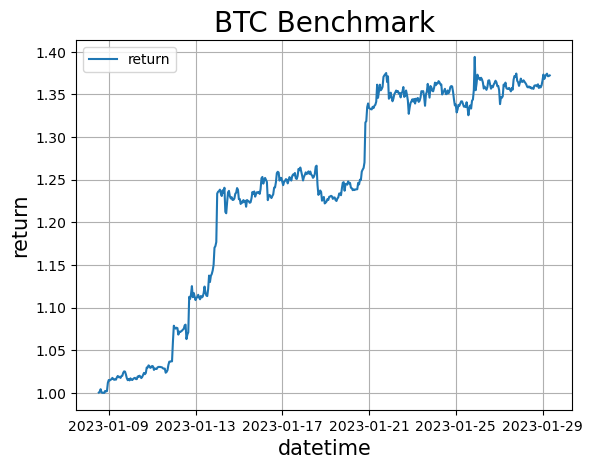

In [152]:
# Let's plot return
plt.plot(df['total_benchmark'], label = 'return')
plt.ylabel('return', fontsize = 15 )
plt.xlabel('datetime', fontsize = 15 )
plt.title('BTC Benchmark', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

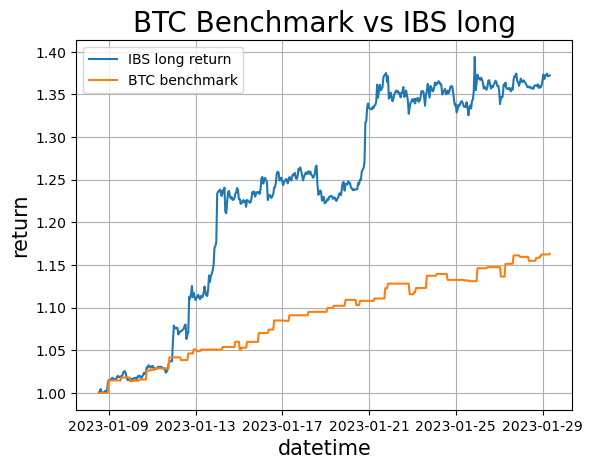

In [155]:
# Let's plot return
plt.plot(df['total_benchmark'], label = 'IBS long return')
plt.plot(df['total_long'], label = 'BTC benchmark')
plt.ylabel('return', fontsize = 15 )
plt.xlabel('datetime', fontsize = 15 )
plt.title('BTC Benchmark vs IBS long', fontsize = 20)
plt.legend()
plt.grid()
plt.show()